# Задание 1

Докажем, что 
$$ \hat{\beta} = (X^{\top} X)^{-1}X^{\top}y $$

Модель можно записать в общем виде: 
$$ y = X\beta $$
где $ X \in \mathbb{R}^{m \times n} $.

Чтобы выразить $ \beta $ в явном виде, домножим исходное равенство на $ X^{\top} $, чтобы получить квадратную матрицу перед $ \beta $:

$$ X^{\top}y = (X^{\top}X)\beta \Rightarrow \boxed{\beta = (X^{\top} X)^{-1}X^{\top}y} $$ - что и требовалось доказать

# Задание 2-4

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import math

import sklearn.linear_model as slmodel

### Статистика по коронавирусу

In [171]:
data = pd.read_csv('data.csv')
data = data[['Страна', 'Всего случаев', 'Всего смертей', 'Сделано тестов', 'Население']][2:].reset_index(drop=True)

data['Всего случаев'] = data['Всего случаев'].apply(lambda x: str(x).replace(' ', '')).astype(int)
data['Всего смертей'] = data['Всего смертей'].apply(lambda x: str(x).replace(' ', '')).astype(int)
data['Сделано тестов'] = data['Сделано тестов'].apply(lambda x: str(x).replace(' ', '')).astype(int)
data['Население'] = data['Население'].apply(lambda x: str(x).replace(' ', '')).astype(int)

In [175]:
data.head(7)

,Страна,Всего случаев,Всего смертей,Сделано тестов,Население
0,Россия,362342,3807,9160590,145928655
1,Испания,283339,27117,3556567,46753098
2,Великобритания,265227,37048,3681295,67852019
3,Италия,230555,32955,3539927,60469988
4,Франция,182722,28530,1384633,65259974
5,Германия,181288,8498,3595059,83758696
6,Турция,158762,4397,1873607,84249900


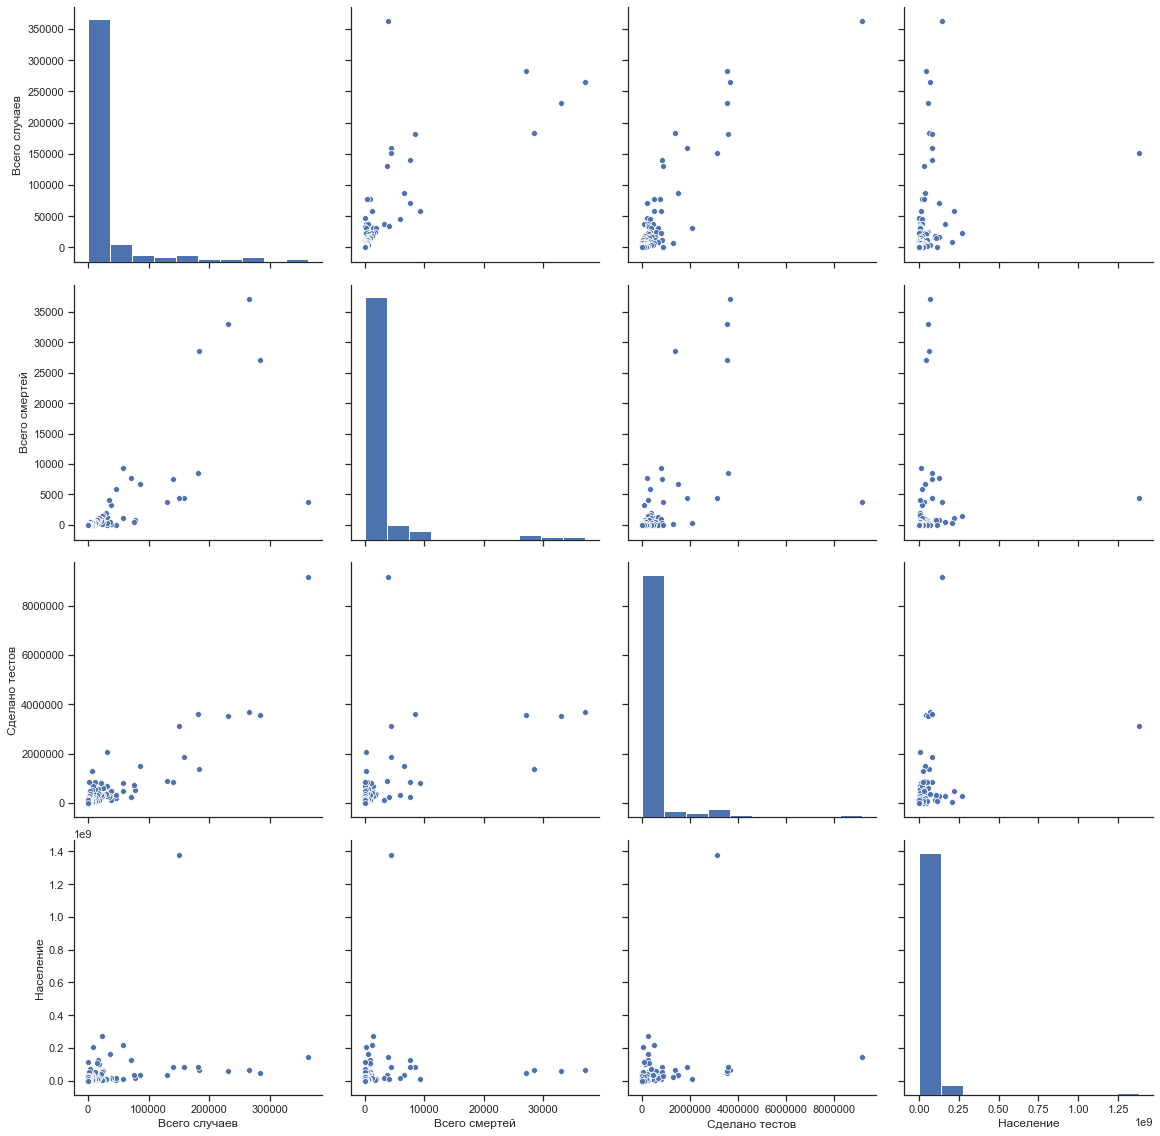

In [177]:
g=sns.pairplot(data[data.columns[1:]], height=4)

#### Посмотрим на зависимость кол-во случаев от населения страны

In [181]:
y = data['Всего случаев'].values
x = data['Население'].values.reshape(-1, 1)

In [182]:
model = slmodel.LinearRegression()

model.fit(x, y)
model.intercept_, model.coef_

(21229.318174241005, array([0.00014103]))

#### Получили модель вида: 
$$ y = 0.00014103x + 21229.318174241005 $$

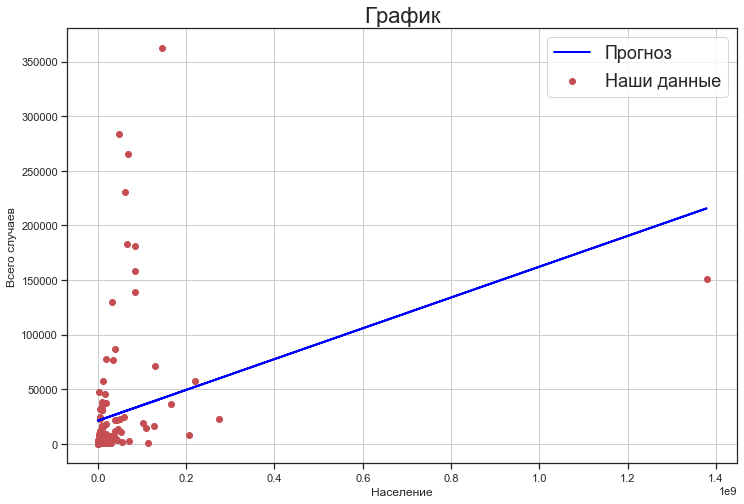

In [198]:
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(data['Население'], data['Всего случаев'], label='Наши данные',  lw=1.0, color = 'r')
plt.plot(data['Население'], [*model.coef_[0]*data['Население']+model.intercept_], label='Прогноз', lw=2.0, color = 'blue')
plt.xlabel("Население", fontsize=12)
plt.ylabel("Всего случаев", fontsize=12)
plt.title('График', fontsize=22)
plt.legend(loc='best', frameon=True, fontsize=18) 
plt.grid()
plt.show()

#### Выглядит неочень из-за больших выбросов

Уберем из выборки страны с предельно большим населением и большим числом зараженных

In [209]:
y1 = data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Всего случаев'].values
x1 = data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Население'].values.reshape(-1, 1)

In [210]:
model1 = slmodel.LinearRegression()

model1.fit(x1, y1)
model1.intercept_, model1.coef_

(2884.8972783357976, array([7.6426813e-05]))

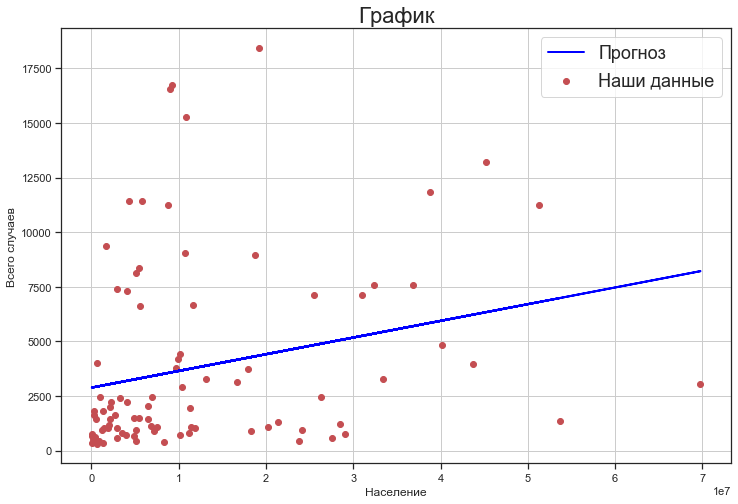

In [211]:
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Население'], data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Всего случаев'], label='Наши данные',  lw=1.0, color = 'r')
plt.plot(data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Население'], [*model1.coef_[0]*data[(data['Всего случаев'] < 20000)&(data['Население'] < 100000000)]['Население']+model1.intercept_], label='Прогноз', lw=2.0, color = 'blue')
plt.xlabel("Население", fontsize=12)
plt.ylabel("Всего случаев", fontsize=12)
plt.title('График', fontsize=22)
plt.legend(loc='best', frameon=True, fontsize=18) 
plt.grid()
plt.show()

####  Стало чуть красивее, но все еще кажется, что линейная регрессия здесь не очень подходит)

# Задача 3.5

In [213]:
table = {
    "S":pd.Series([3, 6, 5, 3.5, 1.5]),
    "Y":pd.Series([40, 55, 45, 30, 30]),
    "W":pd.Series([60, 36, 36, 15, 90])
}
tab = pd.DataFrame(table)

In [215]:
tab

,S,Y,W
0,3.0,40,60
1,6.0,55,36
2,5.0,45,36
3,3.5,30,15
4,1.5,30,90


### а)

In [217]:
x = tab[['Y', 'W']]
y = tab['S']

In [218]:
model2 = slmodel.LinearRegression()
model2.fit(x, y)
model2.intercept_, model2.coef_

(0.27873865579376567, array([ 0.12287913, -0.02940725]))

Получили:

$$ S = 0.12287913*Y - 0.12287913*W + 0.27873865579376567  $$

In [229]:
def f(Y,W):
    return model2.coef_[0]*Y + model2.coef_[1]*W + model2.intercept_

### б)

In [231]:
print('Спрогнозированный доход: {}'.format(f(40, 25)))

Спрогнозированный доход: 4.458722434126879


### в) Посмотрим на разницу:

$$ S_2 - S_1 = 0.12287913(Y_2-Y_1) = 0.12287913*10 = \boxed{1.2287913} $$

### в) Посмотрим на разницу:

$$ S_2 - S_1 = 0.12287913(Y_2-Y_1) - 0.12287913(W_2-W_1)  $$

In [233]:
print('Ответ: {}'.format(model2.coef_[0]*5 + model2.coef_[1]*15))

Ответ: 0.1732868604498224


### г)

In [234]:
tab['predict'] = model2.coef_[0]*tab.Y + model2.coef_[1]*tab.W + model2.intercept_
tab['error'] = tab.S - tab.predict

In [235]:
tab

,S,Y,W,predict,error
0,3.0,40,60,3.429469,-0.429469
1,6.0,55,36,5.978430,0.021570
2,5.0,45,36,4.749638,0.250362
3,3.5,30,15,3.524004,-0.024004
4,1.5,30,90,1.318460,0.181540


In [236]:
print('Дисперсия ошибки: {}'.format(tab.error.var()))

Дисперсия ошибки: 0.07028064579771132
